In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train_data = pd.read_csv("""/content/drive/MyDrive/GUVI Capstone projects/Project4/train.csv""")
test_data = pd.read_csv("""/content/drive/MyDrive/GUVI Capstone projects/Project4/test.csv""")

In [ ]:
import sys
print(sys.executable)

/usr/bin/python3


Description of Data

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132379 entries, 0 to 132378
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   year                  132379 non-null  int64 
 1   month                 132379 non-null  int64 
 2   day                   132379 non-null  int64 
 3   order                 132379 non-null  int64 
 4   country               132379 non-null  int64 
 5   session_id            132379 non-null  int64 
 6   page1_main_category   132379 non-null  int64 
 7   page2_clothing_model  132379 non-null  object
 8   colour                132379 non-null  int64 
 9   location              132379 non-null  int64 
 10  model_photography     132379 non-null  int64 
 11  price                 132379 non-null  int64 
 12  price_2               132379 non-null  int64 
 13  page                  132379 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 14.1+ MB


In [ ]:
train_data.describe(include="all")

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page
count,132379.0,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B4,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2824,NaN,NaN,NaN,NaN,NaN,NaN
mean,2008.0,5.582759,14.507671,9.811314,26.949629,12038.722063,2.400426,NaN,6.227393,3.261106,1.260026,43.788191,1.488484,1.712137
std,0.0,1.328064,8.829106,13.458937,7.153071,7012.460866,1.145004,NaN,4.238354,1.714058,0.438650,12.539390,0.499869,0.983699
min,2008.0,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,2008.0,4.000000,7.000000,2.000000,29.000000,5905.000000,1.000000,NaN,3.000000,2.000000,1.000000,33.000000,1.000000,1.000000
50%,2008.0,5.000000,14.000000,6.000000,29.000000,11931.000000,2.000000,NaN,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,2008.0,7.000000,22.000000,12.000000,29.000000,18212.000000,3.000000,NaN,9.000000,5.000000,2.000000,52.000000,2.000000,2.000000


In [ ]:
train_data.head(7)

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page
0,2008,6,22,21,29,15648,3,C20,13,1,2,48,1,2
1,2008,5,19,6,29,10018,2,B26,13,3,1,57,1,2
2,2008,7,15,2,29,19388,3,C13,9,5,1,48,1,1
3,2008,5,2,2,29,7181,2,B11,2,4,1,43,2,1
4,2008,6,9,16,29,13493,2,B31,9,5,1,57,1,2
5,2008,8,8,1,29,23239,3,C38,13,1,1,38,2,3
6,2008,5,2,11,29,7109,3,C24,12,2,1,33,2,2


In [ ]:
train_data['order'].value_counts()

,count
order,
1,19281
2,15230
3,12446
4,10406
5,8733
...,...
185,1
174,1
195,1


## Mapping

In [ ]:
location_mapping = {
    1: "top left",
    2: "top in the middle",
    3: "top right",
    4: "bottom left",
    5: "bottom in the middle",
    6: "bottom right"
}

model_photography_mapping = {
    1: "en face",
    2: "profile"
}

price2_mapping = {
    1: "yes",
    2: "no"
}

In [ ]:
country_mapping = {
    1: "Australia",
    2: "Austria",
    3: "Belgium",
    4: "British Virgin Islands",
    5: "Cayman Islands",
    6: "Christmas Island",
    7: "Croatia",
    8: "Cyprus",
    9: "Czech Republic",
    10: "Denmark",
    11: "Estonia",
    12: "unidentified",
    13: "Faroe Islands",
    14: "Finland",
    15: "France",
    16: "Germany",
    17: "Greece",
    18: "Hungary",
    19: "Iceland",
    20: "India",
    21: "Ireland",
    22: "Italy",
    23: "Latvia",
    24: "Lithuania",
    25: "Luxembourg",
    26: "Mexico",
    27: "Netherlands",
    28: "Norway",
    29: "Poland",
    30: "Portugal",
    31: "Romania",
    32: "Russia",
    33: "San Marino",
    34: "Slovakia",
    35: "Slovenia",
    36: "Spain",
    37: "Sweden",
    38: "Switzerland",
    39: "Ukraine",
    40: "United Arab Emirates",
    41: "United Kingdom",
    42: "USA",
    43: "biz (.biz)",
    44: "com (.com)",
    45: "int (.int)",
    46: "net (.net)",
    47: "org (*.org)"
}

In [ ]:
color_mapping = {
    1: "beige",
    2: "black",
    3: "blue",
    4: "brown",
    5: "burgundy",
    6: "gray",
    7: "green",
    8: "navy blue",
    9: "of many colors",
    10: "olive",
    11: "pink",
    12: "red",
    13: "violet",
    14: "white"
}

In [ ]:
product_mapping={
    1:"trousers",
2:"skirts",
3:"blouses",
4:"sale"
}

In [ ]:
month_dict = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}

# EDA

### 1. Unique Sessions

In [ ]:
print(f"Total unique sessions: {train_data['session_id'].nunique()}")

Total unique sessions: 22910


### 2. Top 5 Most Frequent Countries

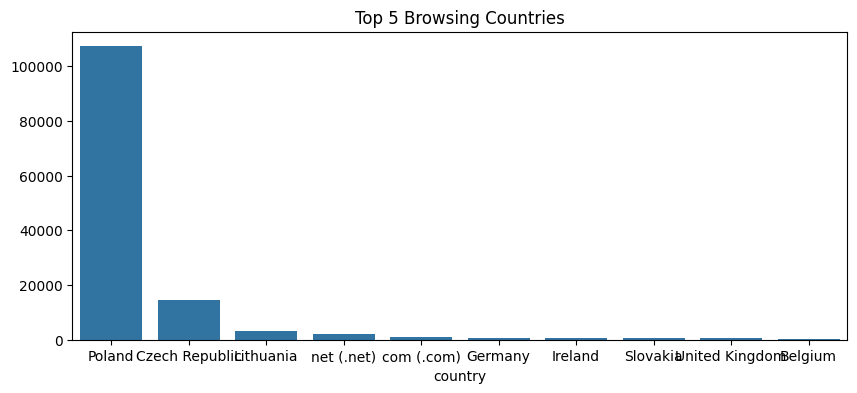

In [ ]:
top_countries = train_data["country"].value_counts().head(10).rename(index=country_mapping)
plt.figure(figsize=(10, 4))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title("Top 5 Browsing Countries")
plt.show()

### 3. Most Popular Product Categories

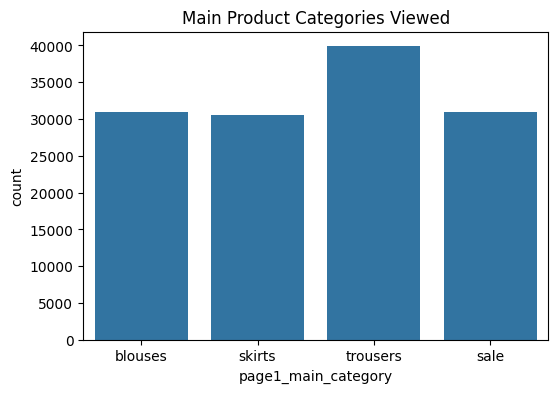

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=train_data["page1_main_category"].map(product_mapping))
plt.title("Main Product Categories Viewed")
plt.show()


### 4. Page Count Distribution

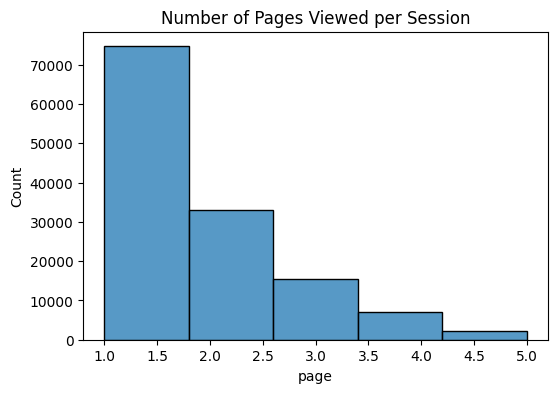

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(train_data["page"], bins=5)
plt.title("Number of Pages Viewed per Session")
plt.show()

### 5. Price Distribution

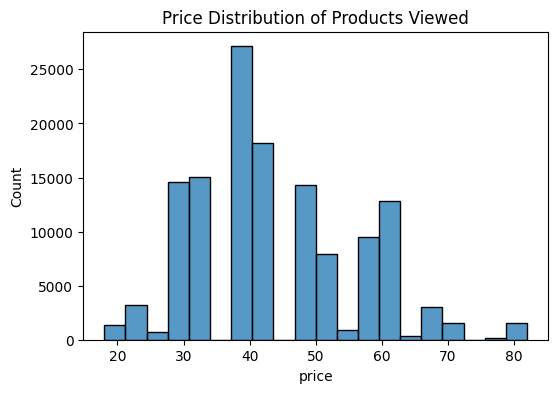

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(train_data["price"], bins=20)
plt.title("Price Distribution of Products Viewed")
plt.show()

### 6. Browsing Behavior by Month

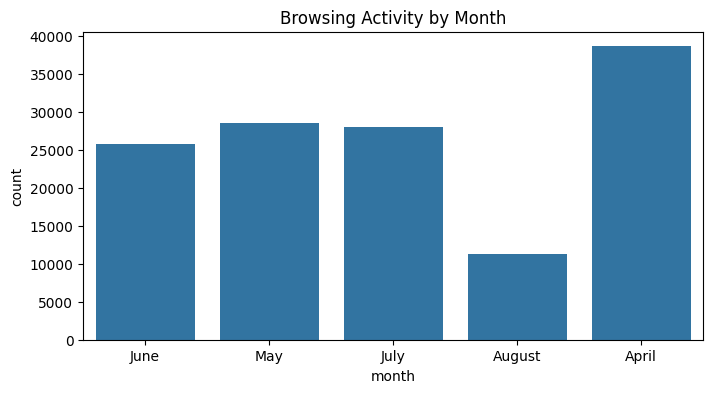

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x=train_data["month"].map(month_dict))
plt.title("Browsing Activity by Month")
plt.show()

### 7. Price Comparison by Model Photography

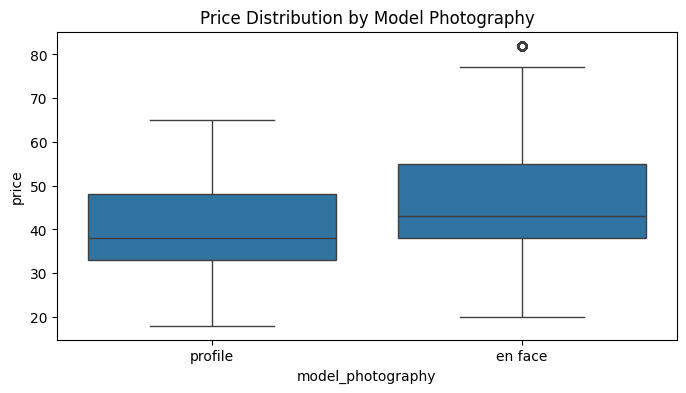

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=train_data["model_photography"].map(model_photography_mapping), y=train_data["price"])
plt.title("Price Distribution by Model Photography")
plt.show()

### 8. Correlation Heatmap

In [ ]:
num_features=train_data.select_dtypes(include=['float64',"int64"]).columns.tolist()
num_features

['year',
 'month',
 'day',
 'order',
 'country',
 'session_id',
 'page1_main_category',
 'colour',
 'location',
 'model_photography',
 'price',
 'price_2',
 'page']

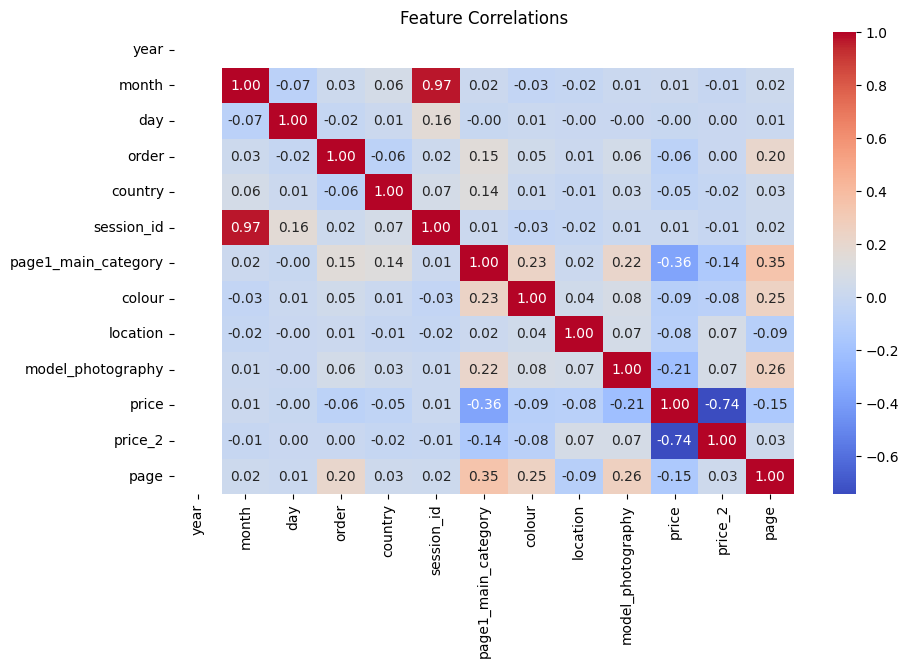

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_data[num_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations")
plt.show()

### 9. Most Common Clothing Models

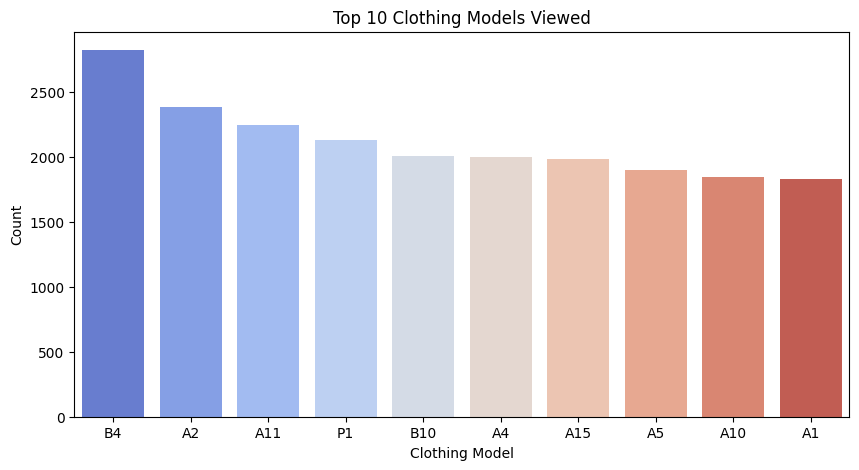

In [ ]:
plt.figure(figsize=(10, 5))
top_models = train_data["page2_clothing_model"].value_counts().head(10)
sns.barplot(x=top_models.index, y=top_models.values, palette="coolwarm")
plt.title("Top 10 Clothing Models Viewed")
plt.xlabel("Clothing Model")
plt.ylabel("Count")
plt.show()

### 10. Most Common Colors

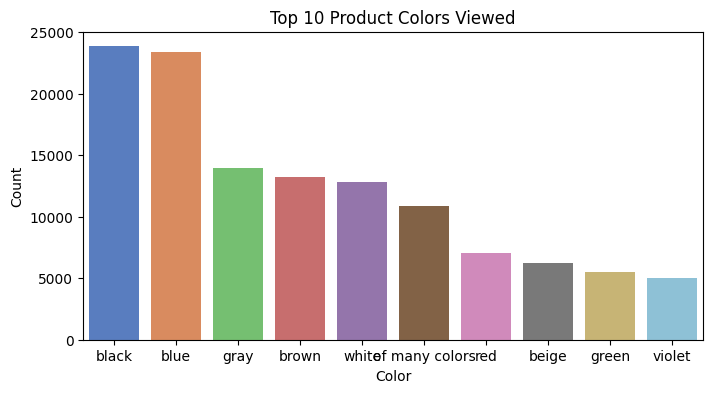

In [ ]:
plt.figure(figsize=(8, 4))
top_colors = train_data["colour"].value_counts().head(10)
sns.barplot(x=top_colors.index.map(color_mapping), y=top_colors.values, palette="muted")
plt.title("Top 10 Product Colors Viewed")
plt.xlabel("Color")
plt.ylabel("Count")
plt.show()

### 11. Clicks (Orders) Per Session

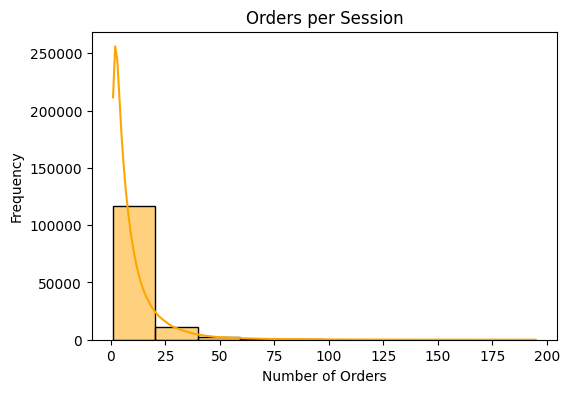

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(train_data["order"], bins=10, kde=True, color="orange")
plt.title("Orders per Session")
plt.xlabel("Number of Orders")
plt.ylabel("Frequency")
plt.show()

### 12. Percentage of Products Above Category Average Price

In [ ]:
above_avg_price = (train_data["price_2"]==1).mean() * 100
print(f"Percentage of products priced above category average: {above_avg_price:.2f}%")

Percentage of products priced above category average: 51.15%


### 13. Day-of-Month Analysis

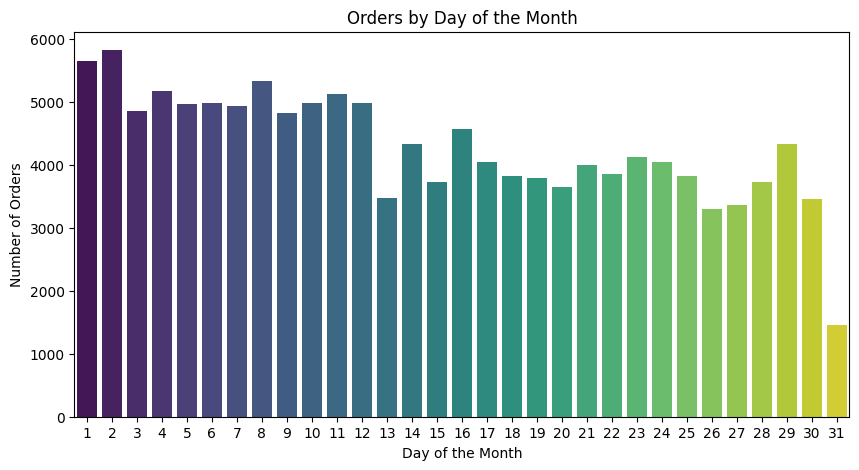

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x=train_data["day"], palette="viridis")
plt.title("Orders by Day of the Month")
plt.xlabel("Day of the Month")
plt.ylabel("Number of Orders")
plt.show()

### 14. Busiest Days for Orders

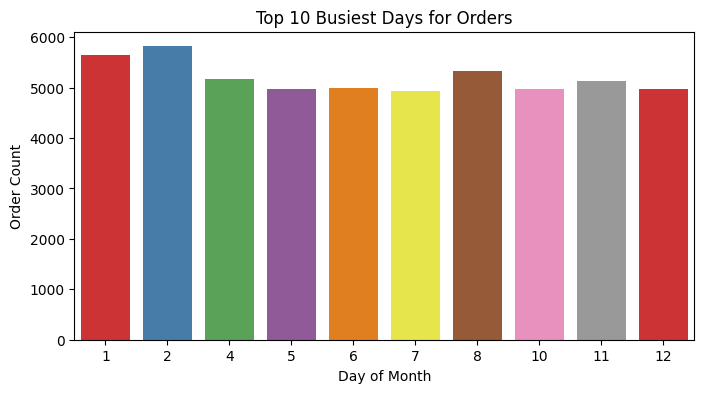

In [ ]:
plt.figure(figsize=(8, 4))
top_days = train_data["day"].value_counts().head(10)
sns.barplot(x=top_days.index, y=top_days.values, palette="Set1")
plt.title("Top 10 Busiest Days for Orders")
plt.xlabel("Day of Month")
plt.ylabel("Order Count")
plt.show()

### 15. Browsing Behavior by Country

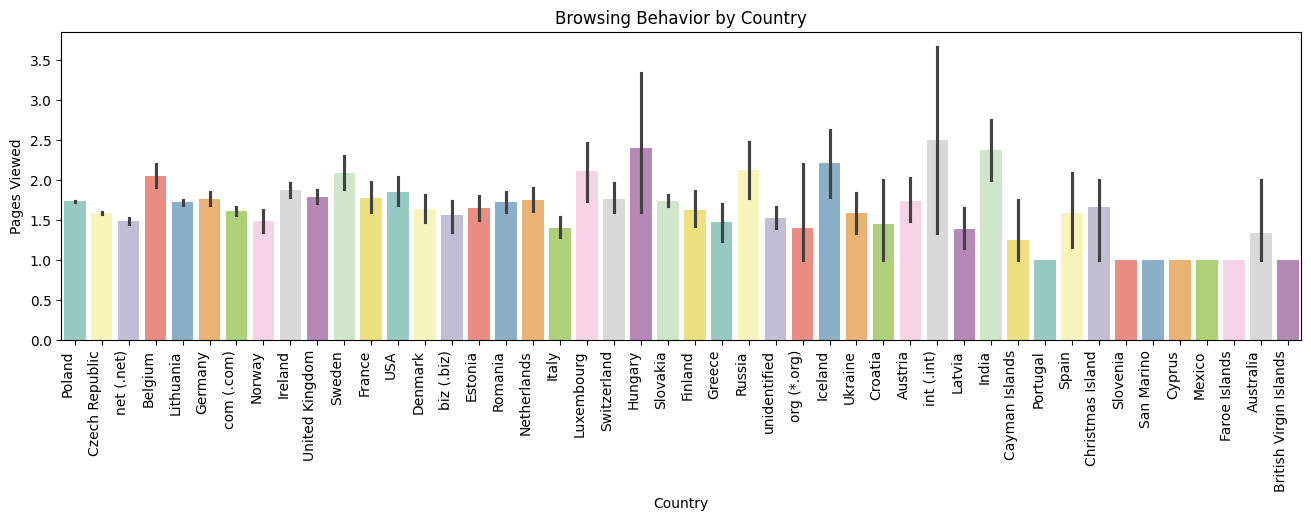

In [ ]:
plt.figure(figsize=(16, 4))
sns.barplot(x=train_data["country"].map(country_mapping), y=train_data["page"], palette="Set3")
plt.title("Browsing Behavior by Country")
plt.xticks(rotation=90, ha='right')
plt.xlabel("Country")
plt.ylabel("Pages Viewed")
plt.show()

### 16.Does Price Influence Clicks?

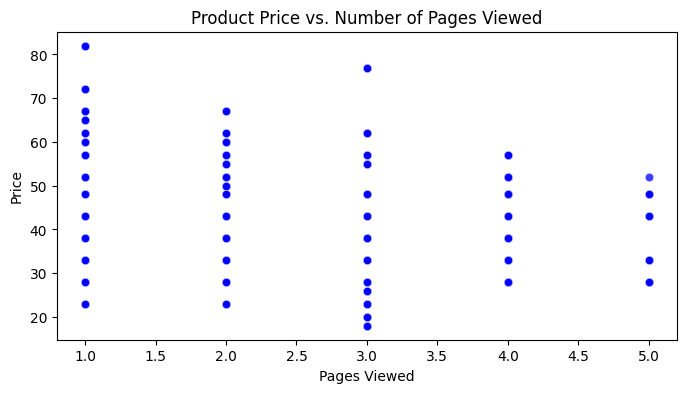

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=train_data["page"], y=train_data["price"], alpha=0.5, color="blue")
plt.title("Product Price vs. Number of Pages Viewed")
plt.xlabel("Pages Viewed")
plt.ylabel("Price")
plt.show()